In [33]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

!apt-get install openjdk-8-jdk-headless -qq > /dev/null

!wget -q https://downloads.apache.org/spark/spark-3.5.1/spark-3.5.1-bin-hadoop3.tgz

!tar -xvf spark-3.5.1-bin-hadoop3.tgz

!pip install -q findspark


import os

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.1-bin-hadoop3"

import findspark

findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

from google.colab import files

#uploaded = files.upload()
#upload files test2_new.txt, output3.txt

import pandas as pd
import numpy as np
import csv
import sys
import subprocess

from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
import matplotlib.pyplot as plt
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.tuning import ParamGridBuilder
from pyspark.ml.tuning import CrossValidator


spark-3.5.1-bin-hadoop3/
spark-3.5.1-bin-hadoop3/sbin/
spark-3.5.1-bin-hadoop3/sbin/spark-config.sh
spark-3.5.1-bin-hadoop3/sbin/stop-slave.sh
spark-3.5.1-bin-hadoop3/sbin/stop-mesos-dispatcher.sh
spark-3.5.1-bin-hadoop3/sbin/start-workers.sh
spark-3.5.1-bin-hadoop3/sbin/start-slaves.sh
spark-3.5.1-bin-hadoop3/sbin/start-all.sh
spark-3.5.1-bin-hadoop3/sbin/stop-all.sh
spark-3.5.1-bin-hadoop3/sbin/workers.sh
spark-3.5.1-bin-hadoop3/sbin/start-mesos-dispatcher.sh
spark-3.5.1-bin-hadoop3/sbin/spark-daemon.sh
spark-3.5.1-bin-hadoop3/sbin/decommission-worker.sh
spark-3.5.1-bin-hadoop3/sbin/slaves.sh
spark-3.5.1-bin-hadoop3/sbin/stop-mesos-shuffle-service.sh
spark-3.5.1-bin-hadoop3/sbin/stop-history-server.sh
spark-3.5.1-bin-hadoop3/sbin/stop-worker.sh
spark-3.5.1-bin-hadoop3/sbin/decommission-slave.sh
spark-3.5.1-bin-hadoop3/sbin/stop-thriftserver.sh
spark-3.5.1-bin-hadoop3/sbin/start-worker.sh
spark-3.5.1-bin-hadoop3/sbin/stop-slaves.sh
spark-3.5.1-bin-hadoop3/sbin/start-connect-server.sh


In [34]:
# upload kaggle.json api key from kaggle by going to settings > generate api key to /root/.kaggle folder by going up one level in the file directory and find it
!pip install kaggle
!chmod 600 /root/.kaggle/kaggle.json

In [35]:
ratings_df = pd.read_csv('test2_new.txt', sep="|", header=None)
test_df = pd.read_csv('output3.txt', sep="|")
ratings_df.rename(columns = {0:'UserID', 1:'TrackID', 2:'Rating'}, inplace = True)
train_df = ratings_df.merge(test_df)
sub_train_df = train_df[["AlbumRating", "ArtistRating", "Genre1Rating", "Genre2Rating", "Genre3Rating", "Genre4Rating", "Genre5Rating", "Genre6Rating", "Genre7Rating", "NumberRatedGenres", "MaxGenreScore", "MinGenreScore", "SumGenreScores", "AverageGenreScore", "VarianceGenreScore" ]]
sub_train_df = pd.concat([sub_train_df, ratings_df["Rating"]], axis="columns")
sub_train_df = spark.createDataFrame(sub_train_df)
sub_train_df.show()
sub_test_df = test_df[["UserID", "TrackID", "AlbumRating", "ArtistRating", "Genre1Rating", "Genre2Rating", "Genre3Rating", "Genre4Rating", "Genre5Rating", "Genre6Rating", "Genre7Rating", "NumberRatedGenres", "MaxGenreScore", "MinGenreScore", "SumGenreScores", "AverageGenreScore", "VarianceGenreScore" ]]
sub_test_df = spark.createDataFrame(sub_test_df)

+-----------+------------+------------+------------+------------+------------+------------+------------+------------+-----------------+-------------+-------------+--------------+------------------+------------------+------+
|AlbumRating|ArtistRating|Genre1Rating|Genre2Rating|Genre3Rating|Genre4Rating|Genre5Rating|Genre6Rating|Genre7Rating|NumberRatedGenres|MaxGenreScore|MinGenreScore|SumGenreScores| AverageGenreScore|VarianceGenreScore|Rating|
+-----------+------------+------------+------------+------------+------------+------------+------------+------------+-----------------+-------------+-------------+--------------+------------------+------------------+------+
|       90.0|        50.0|        90.0|        80.0|         0.0|         0.0|         0.0|         0.0|         0.0|                2|         90.0|          0.0|         170.0|              85.0|1481.6326530612243|     1|
|       90.0|         0.0|        90.0|        80.0|         0.0|         0.0|         0.0|         0.0|

In [36]:
# for testing purposes only
"""
print(ratings_df.head(10))
print(test_df.head(10))
print(len(ratings_df))
print(len(test_df))
#train_df = test_df[["UserID", "TrackID"]]
train_df = ratings_df.merge(test_df)
print(train_df.head(10))
print(len(train_df))
#esh = test_df.query('UserID == 200031')
#print(esh)
# DROP USERID AND TRACKID FOR TRAINING AND POSSIBLY MOVE RATINGS COLUMN TO END
#sub_train_df = train_df[["AlbumRating", "ArtistRating", "Genre1Rating", "Genre2Rating", "Genre3Rating", "Genre4Rating", "Genre5Rating", "Genre6Rating", "Genre7Rating", "NumberRatedGenres", "MaxGenreScore", "MinGenreScore", "SumGenreScores", "AverageGenreScore", "VarianceGenreScore" ]]
print(sub_train_df.head(10))
print(sub_train_df.dtypes)
"""

'\nprint(ratings_df.head(10))\nprint(test_df.head(10))\nprint(len(ratings_df))\nprint(len(test_df))\n#train_df = test_df[["UserID", "TrackID"]]\ntrain_df = ratings_df.merge(test_df)\nprint(train_df.head(10))\nprint(len(train_df))\n#esh = test_df.query(\'UserID == 200031\')\n#print(esh)\n# DROP USERID AND TRACKID FOR TRAINING AND POSSIBLY MOVE RATINGS COLUMN TO END\n#sub_train_df = train_df[["AlbumRating", "ArtistRating", "Genre1Rating", "Genre2Rating", "Genre3Rating", "Genre4Rating", "Genre5Rating", "Genre6Rating", "Genre7Rating", "NumberRatedGenres", "MaxGenreScore", "MinGenreScore", "SumGenreScores", "AverageGenreScore", "VarianceGenreScore" ]]\nprint(sub_train_df.head(10))\nprint(sub_train_df.dtypes)\n'

In [37]:
# possibly add standard scaler
features = ["AlbumRating", "ArtistRating", "Genre1Rating", "Genre2Rating", "Genre3Rating", "Genre4Rating", "Genre5Rating", "Genre6Rating", "Genre7Rating", "NumberRatedGenres", "MaxGenreScore", "MinGenreScore", "SumGenreScores", "AverageGenreScore", "VarianceGenreScore" ]
assembler = VectorAssembler(inputCols=features, outputCol='Features')
sub_train_df = assembler.transform(sub_train_df)
sub_test_df = assembler.transform(sub_test_df)
"""
pipeline = Pipeline(stages = assembler)
pipelineModel = pipeline.fit(sub_train_df)
sub_train_df = pipelineModel.transform(sub_train_df)
"""
sub_train_df.show()
sub_test_df.show()

+-----------+------------+------------+------------+------------+------------+------------+------------+------------+-----------------+-------------+-------------+--------------+------------------+------------------+------+--------------------+
|AlbumRating|ArtistRating|Genre1Rating|Genre2Rating|Genre3Rating|Genre4Rating|Genre5Rating|Genre6Rating|Genre7Rating|NumberRatedGenres|MaxGenreScore|MinGenreScore|SumGenreScores| AverageGenreScore|VarianceGenreScore|Rating|            Features|
+-----------+------------+------------+------------+------------+------------+------------+------------+------------+-----------------+-------------+-------------+--------------+------------------+------------------+------+--------------------+
|       90.0|        50.0|        90.0|        80.0|         0.0|         0.0|         0.0|         0.0|         0.0|                2|         90.0|          0.0|         170.0|              85.0|1481.6326530612243|     1|[90.0,50.0,90.0,8...|
|       90.0|       

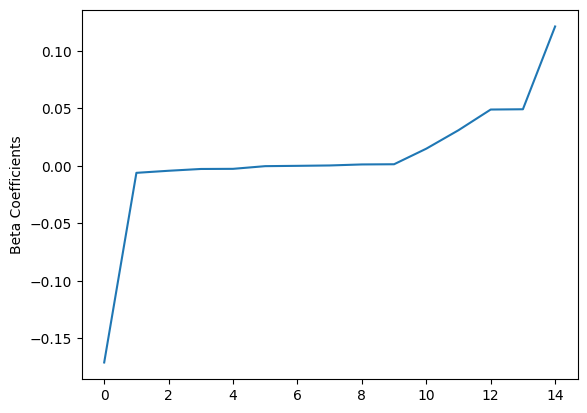

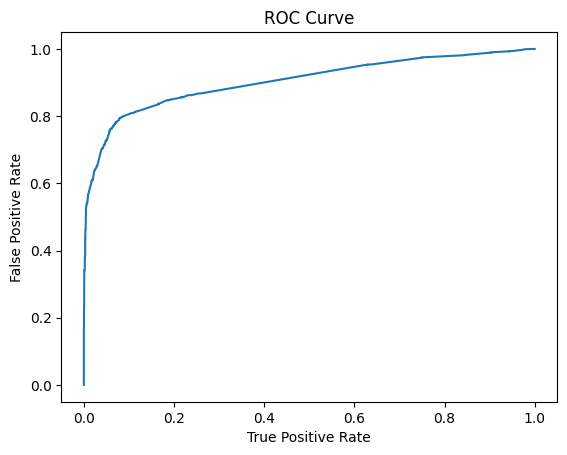

Training set areaUnderROC: 0.9035697222222222
+------+-------+-----------+------------+------------+------------+------------+------------+------------+------------+------------+-----------------+-------------+-------------+--------------+------------------+------------------+--------------------+--------------------+--------------------+----------+
|UserID|TrackID|AlbumRating|ArtistRating|Genre1Rating|Genre2Rating|Genre3Rating|Genre4Rating|Genre5Rating|Genre6Rating|Genre7Rating|NumberRatedGenres|MaxGenreScore|MinGenreScore|SumGenreScores| AverageGenreScore|VarianceGenreScore|            Features|       rawPrediction|         probability|prediction|
+------+-------+-----------+------------+------------+------------+------------+------------+------------+------------+------------+-----------------+-------------+-------------+--------------+------------------+------------------+--------------------+--------------------+--------------------+----------+
|199810| 208019|        0.0|        

In [38]:
#Logistic Regression
iter = 10
lr = LogisticRegression(featuresCol = "Features", labelCol = "Rating", maxIter=iter)
lrModel = lr.fit(sub_train_df)
beta = np.sort(lrModel.coefficients)
plt.plot(beta)
plt.ylabel("Beta Coefficients")
plt.show()
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc["FPR"],roc["TPR"])
plt.ylabel("False Positive Rate")
plt.xlabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()
print("Training set areaUnderROC: " + str(trainingSummary.areaUnderROC))
predictions = lrModel.transform(sub_test_df)
predictions.show(10)
predictions.count()
#evaluator = BinaryClassificationEvaluator()
#print("Test Area Under ROC", evaluator.evaluate(predictions))

predictions_pandas = predictions.toPandas()
kaggle_output = 'myprediction1_kaggle_lr.csv'
fOut_submission = open(kaggle_output, 'w')
csv_writer = csv.writer(fOut_submission)
header_submission = ["TrackID", "Predictor"]
csv_writer.writerow(header_submission)
for i in range(len(predictions_pandas)):
    csv_writer.writerow([f"{predictions_pandas['UserID'][i]}_{predictions_pandas['TrackID'][i]}", int(predictions_pandas["prediction"][i])])
fOut_submission.close()

!kaggle competitions submit -c aai627-spring2024 -f myprediction1_kaggle_lr.csv -m "Logistic Regression Predictions maxIter = $iter"
!kaggle competitions submissions -c aai627-spring2024

In [39]:
# Decision Tree Classifier
depth = 10
dt = DecisionTreeClassifier(featuresCol = "Features",
labelCol = "Rating", maxDepth = depth)
dtModel = dt.fit(sub_train_df)
predictions = dtModel.transform(sub_test_df)
predictions.show(10)
print(predictions.count())
evaluator = BinaryClassificationEvaluator()
#print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

predictions_pandas = predictions.toPandas()
kaggle_output = 'myprediction1_kaggle_dt.csv'
fOut_submission = open(kaggle_output, 'w')
csv_writer = csv.writer(fOut_submission)
header_submission = ["TrackID", "Predictor"]
csv_writer.writerow(header_submission)
for i in range(len(predictions_pandas)):
    csv_writer.writerow([f"{predictions_pandas['UserID'][i]}_{predictions_pandas['TrackID'][i]}", int(predictions_pandas["prediction"][i])])
fOut_submission.close()

!kaggle competitions submit -c aai627-spring2024 -f myprediction1_kaggle_dt.csv -m "Decision Tree Classifier Predictions maxDepth = $depth"
!kaggle competitions submissions -c aai627-spring2024

+------+-------+-----------+------------+------------+------------+------------+------------+------------+------------+------------+-----------------+-------------+-------------+--------------+------------------+------------------+--------------------+--------------+--------------------+----------+
|UserID|TrackID|AlbumRating|ArtistRating|Genre1Rating|Genre2Rating|Genre3Rating|Genre4Rating|Genre5Rating|Genre6Rating|Genre7Rating|NumberRatedGenres|MaxGenreScore|MinGenreScore|SumGenreScores| AverageGenreScore|VarianceGenreScore|            Features| rawPrediction|         probability|prediction|
+------+-------+-----------+------------+------------+------------+------------+------------+------------+------------+------------+-----------------+-------------+-------------+--------------+------------------+------------------+--------------------+--------------+--------------------+----------+
|199810| 208019|        0.0|         0.0|         0.0|         0.0|         0.0|         0.0|       

In [40]:
# Random Forest Classifier
rf = RandomForestClassifier(featuresCol = "Features", labelCol = "Rating")
rfModel = rf.fit(sub_train_df)
predictions = rfModel.transform(sub_test_df)
predictions.show()
print(predictions.count())
evaluator = BinaryClassificationEvaluator()
#print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"}))

predictions_pandas = predictions.toPandas()
kaggle_output = 'myprediction1_kaggle_rf.csv'
fOut_submission = open(kaggle_output, 'w')
csv_writer = csv.writer(fOut_submission)
header_submission = ["TrackID", "Predictor"]
csv_writer.writerow(header_submission)
for i in range(len(predictions_pandas)):
    csv_writer.writerow([f"{predictions_pandas['UserID'][i]}_{predictions_pandas['TrackID'][i]}", int(predictions_pandas["prediction"][i])])
fOut_submission.close()

!kaggle competitions submit -c aai627-spring2024 -f myprediction1_kaggle_rf.csv -m "Random Forest Classifier Predictions"
!kaggle competitions submissions -c aai627-spring2024

+------+-------+-----------+------------+------------+------------+------------+------------+------------+------------+------------+-----------------+-------------+-------------+--------------+------------------+------------------+--------------------+--------------------+--------------------+----------+
|UserID|TrackID|AlbumRating|ArtistRating|Genre1Rating|Genre2Rating|Genre3Rating|Genre4Rating|Genre5Rating|Genre6Rating|Genre7Rating|NumberRatedGenres|MaxGenreScore|MinGenreScore|SumGenreScores| AverageGenreScore|VarianceGenreScore|            Features|       rawPrediction|         probability|prediction|
+------+-------+-----------+------------+------------+------------+------------+------------+------------+------------+------------+-----------------+-------------+-------------+--------------+------------------+------------------+--------------------+--------------------+--------------------+----------+
|199810| 208019|        0.0|         0.0|         0.0|         0.0|         0.0|  

In [43]:
# Gradient Boosted Tree Classifier
iter = 50
gbt = GBTClassifier(featuresCol= "Features", labelCol= "Rating", maxIter=iter)
gbtModel = gbt.fit(sub_train_df)
predictions = gbtModel.transform(sub_test_df)
predictions.show()
print(predictions.count())
evaluator = BinaryClassificationEvaluator()
#print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, evaluator.metricName: "areaUnderROC"))

predictions_pandas = predictions.toPandas()
kaggle_output = 'myprediction1_kaggle_gbt.csv'
fOut_submission = open(kaggle_output, 'w')
csv_writer = csv.writer(fOut_submission)
header_submission = ["TrackID", "Predictor"]
csv_writer.writerow(header_submission)
for i in range(len(predictions_pandas)):
    csv_writer.writerow([f"{predictions_pandas['UserID'][i]}_{predictions_pandas['TrackID'][i]}", int(predictions_pandas["prediction"][i])])
fOut_submission.close()

!kaggle competitions submit -c aai627-spring2024 -f myprediction1_kaggle_gbt.csv -m "Gradient Boosted Tree Classifier Predictions maxIter = $iter"
!kaggle competitions submissions -c aai627-spring2024

+------+-------+-----------+------------+------------+------------+------------+------------+------------+------------+------------+-----------------+-------------+-------------+--------------+------------------+------------------+--------------------+--------------------+--------------------+----------+
|UserID|TrackID|AlbumRating|ArtistRating|Genre1Rating|Genre2Rating|Genre3Rating|Genre4Rating|Genre5Rating|Genre6Rating|Genre7Rating|NumberRatedGenres|MaxGenreScore|MinGenreScore|SumGenreScores| AverageGenreScore|VarianceGenreScore|            Features|       rawPrediction|         probability|prediction|
+------+-------+-----------+------------+------------+------------+------------+------------+------------+------------+------------+-----------------+-------------+-------------+--------------+------------------+------------------+--------------------+--------------------+--------------------+----------+
|199810| 208019|        0.0|         0.0|         0.0|         0.0|         0.0|  

In [42]:
# test block before implementing csv write outs
"""
predictions_pandas = predictions.toPandas()
predictions_pandas.head()
print(len(predictions_pandas))
print(predictions_pandas["UserID"][0])
print(predictions_pandas["UserID"][len(predictions_pandas)-1])
print(predictions_pandas["TrackID"][0])
print(predictions_pandas["TrackID"][len(predictions_pandas)-1])
print(predictions_pandas["prediction"][0])
print(predictions_pandas["prediction"][len(predictions_pandas)-1])
"""

'\npredictions_pandas = predictions.toPandas()\npredictions_pandas.head()\nprint(len(predictions_pandas))\nprint(predictions_pandas["UserID"][0])\nprint(predictions_pandas["UserID"][len(predictions_pandas)-1])\nprint(predictions_pandas["TrackID"][0])\nprint(predictions_pandas["TrackID"][len(predictions_pandas)-1])\nprint(predictions_pandas["prediction"][0])\nprint(predictions_pandas["prediction"][len(predictions_pandas)-1])\n'